# Problem Set 0
# Due Date: Not Due. 


Welcome to 6.s077! <br> 
We provide Problem Set 0 for you to get comfortable with data analysis in Python. <br>


We recommend you step through all the instructions below (line by line) even though you may already be familiar with data analysis in Python and/or Jupyter notebooks.

Please familiarize yourself with the following common data analysis and machine learning libraries (in Python), which we will be using extensively throughout this course: <br> 

<b>Numpy</b>: http://www.numpy.org/ <br>
<b>Pandas</b>: https://pandas.pydata.org/ <br>
<b>Scipy</b>: https://www.scipy.org/ <br>
<b>Scikit-Learn</b>: http://scikit-learn.org/stable/ <br>
<b>Statsmodels</b>: http://scikit-learn.org/stable/ <br>
<b>Matplotlib</b>: https://matplotlib.org/ <br>

<b>0.</b> We start by printing a quick "Hello, World!". <br>
Please execute the Run command (from the menu above this notebook) on the cell below to ensure you see no errors. You can 'select' a cell by clicking on it and then hit the Run button in the menu above. Errors, or any expected output should show up immediately below the cell. In the case below, you should see a "Hello, World!" printed below the cell.

In [1]:
print("Hello, World!")

Hello, World!


<b>1.</b> You can import the libraries as shown below. Hit Run to ensure the libraries are imported successfully and without errros.

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

print("Libraries imported successfully!")

Libraries imported successfully!


<b>2.</b> Print what versions of the pandas (pd) and numpy (np) are installed on this system. For numpy, see the example below and repeat for pandas.

In [3]:
print("Numpy {}".format(np.__version__))  
print("Pandas {}".format(pd.__version__))

# For those unfamiliar with Python features, .format replaces {} instances
# with the provided arguments and is very useful for easy to read formatting
# of strings

Numpy 1.15.4
Pandas 0.23.4


<b>3a.</b> You are provided with a csv file with 100 observations of daily commute times (in minutes) for an individual. <br>
The data file is called "<b>data.csv</b>". Read the csv as a pandas dataframe object by using the <b>read_csv()</b> function in pandas: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [4]:
df = pd.read_csv("data.csv")

<b>3b.</b> Print the total total number of observations in the dataframe. Confirm that it is 100.

In [5]:
len(df)

100

<b>3c.</b> Print the column names in the dataframe. Confirm that there is only one column.

In [6]:
list(df.columns)

['commute_time']

##### <b>3d.</b> Write a function called <b>mean(np_array)</b> which computes and then returns the sample average of a numpy array. <br>
Call this function on the array of observations for commute_time and print the mean.

In [7]:
def mean(sample):
    """Computes the sample average of an ndarray.
    
    Args:
        sample (ndarray): NumPy array of which to determine the mean. 
            This function assumes there is only a single column.
        
    Returns:
        float: Mean of the provided sample.
        
    """
    return np.sum(sample) / sample.shape[0]

In [8]:
mean(df['commute_time'].values)

15.066961950150128

<b>3e.</b> Now, print the sample average of the commute_time observations using numpy's <b>mean()</b> function. <br> Verify that your own <b>mean()</b> function produces the same sample average as numpy's <b>mean()</b>.

In [9]:
df['commute_time'].values.mean()

15.066961950150128

<b>3f.</b> Write a function called <b>sd(np_array)</b> which computes and then returns the population standard deviation of a numpy array. <br>
Call this function on the array of observations for commute_time and print the population standard deviation.

In [10]:
def sd(sample):
    """Computes the samples standard deviation of an ndarray.
    
    Args:
        sample (ndarray): NumPy array of which to determine the standard
            deviation. This function assumes there is only a single column.
            
    Returns:
        float: Standard deviation of the provided sample.
        
    """
    return np.sqrt(np.sum((sample - mean(sample)) ** 2) / sample.shape[0])

In [11]:
sd(df['commute_time'].values)

4.148359733799694

<b>3g.</b> Now, print the population standard deviation of the commute_time observations using numpy's <b>std()</b> function. <br>
Confirm that your own std() function produces the same population average as numpy's <b>std()</b>. <br>
Note: even though we do not require it here, you should read the <b>np.std()</b> documentation to understand how to compute the <b>sample</b> (unbiased) standard deviation (instead of the population standard deviation).

In [12]:
df['commute_time'].values.std()

4.148359733799694

<b>3h.</b> Produce a histogram of the commute_time observations using the <b>hist()</b> function provided by matplotlib.pyplot: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html <br>
Produce two histograms: one with 100 bins and 20 bins. Title your histograms appropriately.

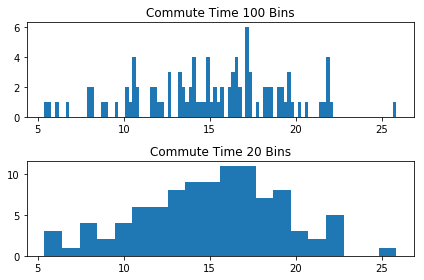

In [13]:
ax1 = plt.subplot(2, 1, 1)
ax1.hist(df['commute_time'], 100)
ax1.set_title('Commute Time 100 Bins')

ax2 = plt.subplot(2, 1, 2)
ax2.hist(df['commute_time'], 20)
ax2.set_title('Commute Time 20 Bins')

plt.tight_layout()

<b>4a.</b> We wish to generate a sample consisting of <b>n</b> randomly drawn records from our data set. <br>
Write a function <b>sample_n(np_array, n)</b> which  produces a random sample of length <b>n</b> (</b>with replacement</b>) of from the numpy array (<b>np_array</b>). <br>
In each step of the iteration you draw an index at random, and all records in <b>np_array</b> are equally likely to be picked. This is called 'sampling with replacement': each record may get selected more than once. <br>
At each drawing, you need to pick a random index (in the range 0: n-1, both inclusive) and pull the corresponding entry from the data array. You may find numpy's random.randint(n) to be useful in randomly selecting indices between 0 and n-1. For more info check: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.randint.html<br>
Produce a random sample of size <b>N=50</b> and then report the mean and population standard deviation of the selected sample. <br>
Use the <b>commute_time</b> array for input data

In [14]:
def sample_n(population, n):
    """Produces a random sample from the population using replacement.
    
    Args:
        population (ndarray): NumPy array of values to sample.
            This function assumes a single column.
        n (int): Size of sample to produce.
        
    Returns:
        ndarray: NumPy array representing the sample.
        
    """
    sample = np.zeros(n)
    
    for i in range(n):
        
        rand_ind = np.random.randint(population.shape[0])
        sample[i] += population[rand_ind]
    
    return sample

In [15]:
sample = sample_n(df['commute_time'], 50)

print(f'Mean: {mean(sample)}')
print(f'Std Dev: {sd(sample)}')

Mean: 15.50207281197203
Std Dev: 4.542066049227872


<b>4b.</b> Now write a function <b>repeat(np_array, N, n)</b> which will do the following: <br>
It calls <b>sample_n()</b> <b>N</b> times, each producing a sample (<b>with replacement</b>) of length <b>n</b> from <b>np_array</b>. <br>
For each of the <b>N</b> samples, compute the <b>mean</b> and <b>population standard deviation</b> and store them in two arrays. Return both the mean and standard deviation arrays (each of length = N). <br>
Call the function <b>repeat()</b> with <b>N = 500</b> and <b>n = 100</b>, and <b>np_array = commute_time</b> array. Store the array of means as <b>mean_samples</b> and the array of standard deviations as <b>sd_samples</b>.<br>

In [16]:
def repeat(population, N, n):
    """Produces N samples from the population of size n and 
    returns the mean and standard deviation of each sample.
    
    Args:
        population (ndarray): NumPy array of values to sample.
            This function assumes a single column.
        N (int): Number of samples to draw.
        n (int): Size of the samples to draw.
    
    Returns:
        ndarray: Means of each sample.
        ndarray: Standard deviations of each sample.
            
    """
    mean_samples = np.zeros(N)
    sd_samples = np.zeros(N)
    
    for i in range(N):
        
        sample = sample_n(population, n)
        
        mean_samples[i] = mean(sample)
        sd_samples[i] = sd(sample)
        
    return mean_samples, sd_samples

In [17]:
mean_samples, sd_samples = repeat(df['commute_time'], 500, 100)

<b>4c.</b> Print the mean of <b>mean_samples</b> and <b>sd_samples</b>.

In [18]:
print(f'Mean of `mean_samples`: {mean(mean_samples)}')
print(f'Mean of `sd_samples`: {mean(sd_samples)}')

Mean of `mean_samples`: 15.0663493525106
Mean of `sd_samples`: 4.118038626013807


<b>4d.</b> Produce separate histograms of the <b>mean_samples</b> and <b>sd_samples</b>. Title your plots appropriately. <br>
Set the number of <b>bins = 10</b>.

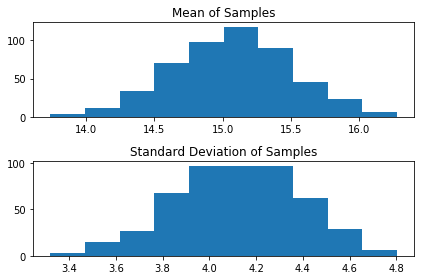

In [19]:
ax1 = plt.subplot(2, 1, 1)
ax1.hist(mean_samples, 10)
ax1.set_title('Mean of Samples')

ax2 = plt.subplot(2, 1, 2)
ax2.hist(sd_samples, 10)
ax2.set_title('Standard Deviation of Samples')

plt.tight_layout()

<b>4e.</b> Repeat the same exercise (plot histograms of means and standard deviations) as above for <b>N=10000</b> and <b>n= 100</b>. What do you notice?

In [20]:
mean_samples, sd_samples = repeat(df['commute_time'], 10000, 100)

In [21]:
print(f'Mean of `mean_samples`: {mean(mean_samples)}')
print(f'Mean of `sd_samples`: {mean(sd_samples)}')

Mean of `mean_samples`: 15.070839183271335
Mean of `sd_samples`: 4.1220100762585234


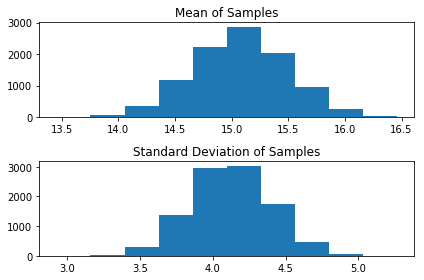

In [22]:
ax1 = plt.subplot(2, 1, 1)
ax1.hist(mean_samples, 10)
ax1.set_title('Mean of Samples')

ax2 = plt.subplot(2, 1, 2)
ax2.hist(sd_samples, 10)
ax2.set_title('Standard Deviation of Samples')

plt.tight_layout()

The distributions start to localize around the true mean and standard deviation as the number of sampling procedures increase. Furthermore, the shape of the distribution is increasingly Normal.

<b>4f.</b> Now write a function <b>sample_n2(np_array, n, with_replacement)</b> which can produce a sample of length n <b>np_array</b> but produces a sample <b>without replacement</b> when <b>with_replacement = False</b>. It should default to <b>with_replacement = True</b> (where you can just call <b>sample_n(np_array, n)</b> from earlier).<br>
Call the <b>sample_n2()</b> function on the with <b>n = 50</b> and <b>with_replacement=True</b> and separately for <b>with_replacement=False</b>. <br>
Print the mean and standard deviation for both cases. Use the <b>commute_time array</b> for input data.

In [23]:
def sample_n2(population, n, with_replacement=True):
    """Produces a random sample from the population with or 
    without replacement.
    
    Args:
        population (ndarray): NumPy array of values to sample.
            This function assumes a single column.
        n (int): Size of sample to produce.
        with_replacement (bool): Whether to replace during 
            sampling or not.
        
    Returns:
        ndarray: NumPy array representing the sample.
        
    """
    
    if with_replacement:
        return sample_n(population, n)
    else:        
        return np.random.choice(population, n, False)

In [24]:
sample = sample_n2(df['commute_time'], 50, True)

print(f'Mean w/Replacement: {mean(sample)}')
print(f'Std Dev w/Replacement: {sd(sample)}', end='\n\n')

sample = sample_n2(df['commute_time'], 50, False)

print(f'Mean w/o Replacement: {mean(sample)}')
print(f'Std Dev w/o Replacement: {sd(sample)}')

Mean w/Replacement: 15.35687074379774
Std Dev w/Replacement: 4.664781160340138

Mean w/o Replacement: 14.785198892589172
Std Dev w/o Replacement: 4.496186698678474
